In [55]:
import numpy as np
import pandas as pd
import re
from pathlib import Path
import math
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns


1) Read the dataset

In [56]:
Analyez = pd.read_csv('../data/clean/branch_metrics.csv')
Analyez

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0
...,...,...,...,...,...,...
11875,Wrightwood-Ashburn,2022,12,575.0,511.0,1410.0
11876,Wrightwood-Ashburn,2023,1,658.0,577.0,1625.0
11877,Wrightwood-Ashburn,2023,2,683.0,561.0,12146.0
11878,Wrightwood-Ashburn,2023,3,834.0,806.0,6312.0


1) Group the data by the library branch and calculate the counts for each branch.

In [57]:
branch_counts = Analyez[["BRANCH", "VISITORS"]].groupby('BRANCH').sum().reset_index()
#branch_counts.columns = ["BRANCH", "COUNT"]
branch_counts

,BRANCH,VISITORS
0,Albany Park,1224086.0
1,Altgeld,530982.0
2,Archer Heights,1085155.0
3,Austin,879538.0
4,Austin-Irving,1226173.0
...,...,...
77,West Pullman,925574.0
78,West Town,1341443.0
79,"Whitney M. Young, Jr.",936389.0
80,Woodson Regional,2890069.0


2) Visualize the counts using plots:

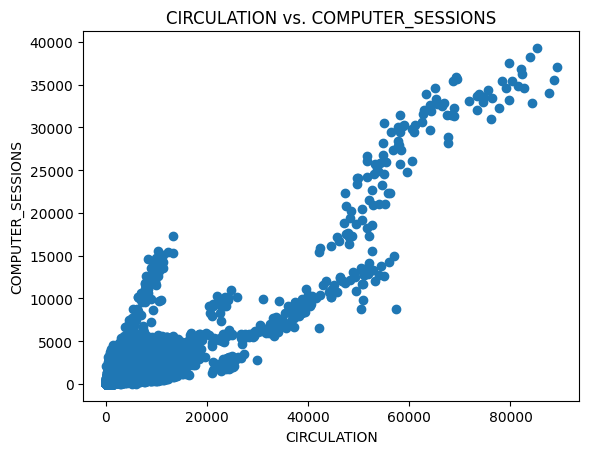

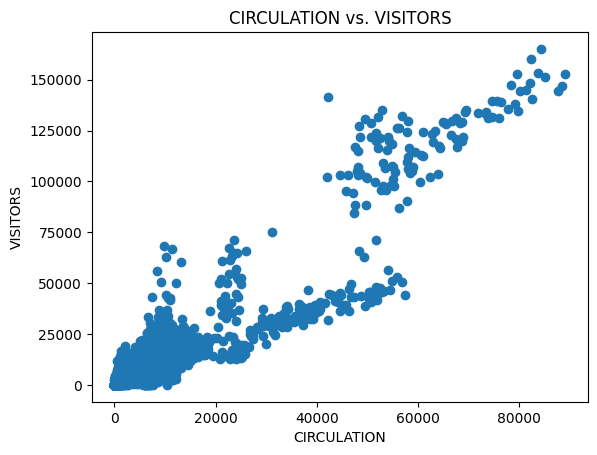

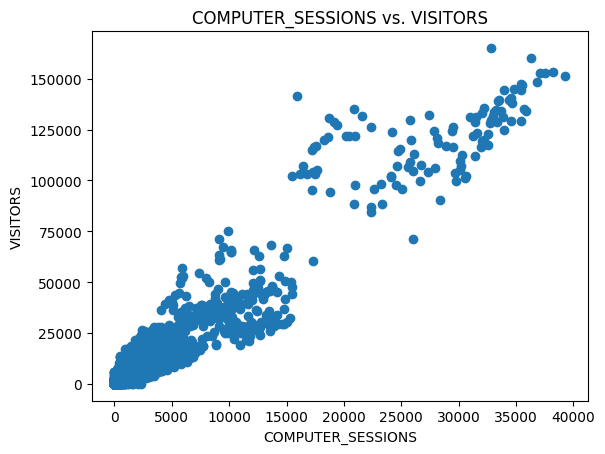

In [58]:

# Select the numerical variables for scatter plots
variables = ['CIRCULATION', 'COMPUTER_SESSIONS', 'VISITORS']

# Create individual scatter plots
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        plt.scatter(Analyez[variables[i]], Analyez[variables[j]])
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.title(f'{variables[i]} vs. {variables[j]}')
        plt.show()


3) Examine the changes in metrics over time:

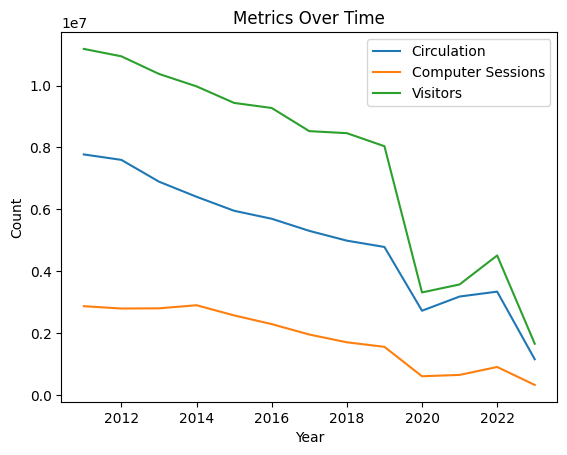

In [59]:
# Line plot of circulation, computer sessions, and visitors over time
metrics_over_time = Analyez.groupby('YEAR').sum()

plt.plot(metrics_over_time.index, metrics_over_time['CIRCULATION'], label='Circulation')
plt.plot(metrics_over_time.index, metrics_over_time['COMPUTER_SESSIONS'], label='Computer Sessions')
plt.plot(metrics_over_time.index, metrics_over_time['VISITORS'], label='Visitors')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Metrics Over Time')
plt.legend()
plt.show()


4) Identify any larger events that may explain periodic drops/rises in the data:

5) Identify outlier branches:

6) Determine the correlations between variables:

In [60]:
# Calculate the average of visitors over each year per branch
average_visitors_per_year_per_branch = Analyez.groupby(['BRANCH', 'YEAR'])['VISITORS'].mean()

# Print the result
print(average_visitors_per_year_per_branch)

BRANCH              YEAR
Albany Park         2011     9785.416667
                    2012     6540.416667
                    2013       35.083333
                    2014     4426.333333
                    2015    12812.583333
                                ...     
Wrightwood-Ashburn  2019     3946.083333
                    2020     1778.166667
                    2021     1022.833333
                    2022     2470.666667
                    2023     6039.250000
Name: VISITORS, Length: 1044, dtype: float64


In [61]:
# Specify the branch and year of interest
branch_of_interest = 'Wrightwood-Ashburn'
year_of_interest = 2022

# Filter the data for the specific branch and year
filtered_data = Analyez.loc[(Analyez['BRANCH'] == branch_of_interest) & (Analyez['YEAR'] == year_of_interest)]

# Calculate the average number of visitors
average_visitors = filtered_data['VISITORS'].mean()

print(f"The average number of visitors for {branch_of_interest} in {year_of_interest} is: {average_visitors:.2f}")


The average number of visitors for Wrightwood-Ashburn in 2022 is: 2470.67


In [62]:
# Specify the branch and year of interest
branch_of_interest = 'Albany Park'
year_of_interest = 2023

# Filter the data for the specific branch and year
filtered_data = Analyez.loc[(Analyez['BRANCH'] == branch_of_interest) & (Analyez['YEAR'] == year_of_interest)]

# Calculate the average number of visitors
average_visitors = filtered_data['VISITORS'].mean()

print(f"The average number of visitors for {branch_of_interest} in {year_of_interest} is: {average_visitors:.2f}")


The average number of visitors for Albany Park in 2023 is: 6896.50


In [63]:
print(Analyez.head())


        BRANCH  YEAR  MONTH  CIRCULATION  COMPUTER_SESSIONS  VISITORS
0  Albany Park  2011      1       8427.0             1666.0    9604.0
1  Albany Park  2011      2       7023.0             1296.0   10500.0
2  Albany Park  2011      3       9702.0             1735.0    9050.0
3  Albany Park  2011      4       9344.0             1841.0    9300.0
4  Albany Park  2011      5       8865.0             1683.0    8271.0


2. Analyze monthly patterns of visitors:

<Axes: title={'center': 'Average of Vistors of All Branches'}, xlabel='Date', ylabel='Average Visitors'>

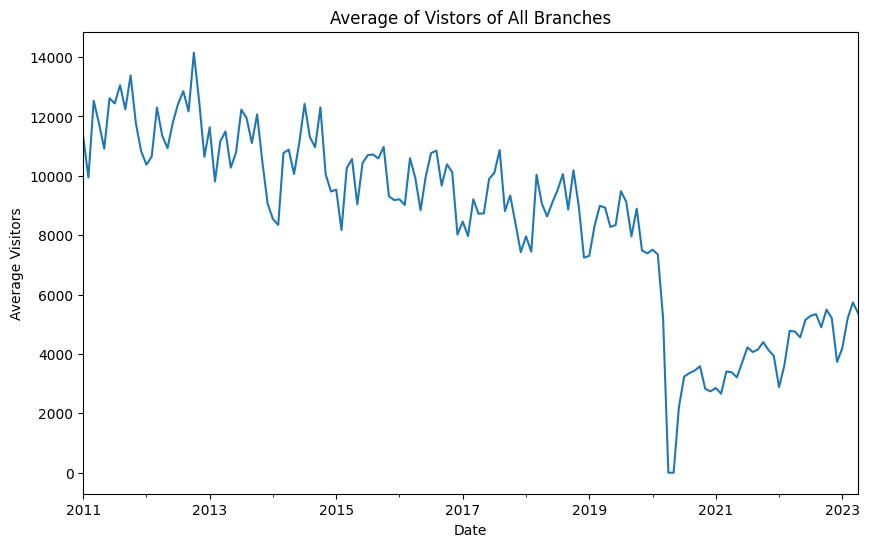

In [64]:

# Convert the 'YEAR' and 'MONTH' columns to a datetime format
Analyez['DATE'] = pd.to_datetime(Analyez[['YEAR', 'MONTH']].assign(DAY=1))

# Group the data by 'DATE' and calculate the mean number of visitors
monthly_visitors = Analyez.groupby('DATE')['VISITORS'].mean()

# Plot the monthly visitor patterns
monthly_visitors.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Visitors', title ='Average of Vistors of All Branches')
 


<Axes: title={'center': 'Average of Non-Zero Vistors of All Branches'}, xlabel='Date', ylabel='Average Visitors'>

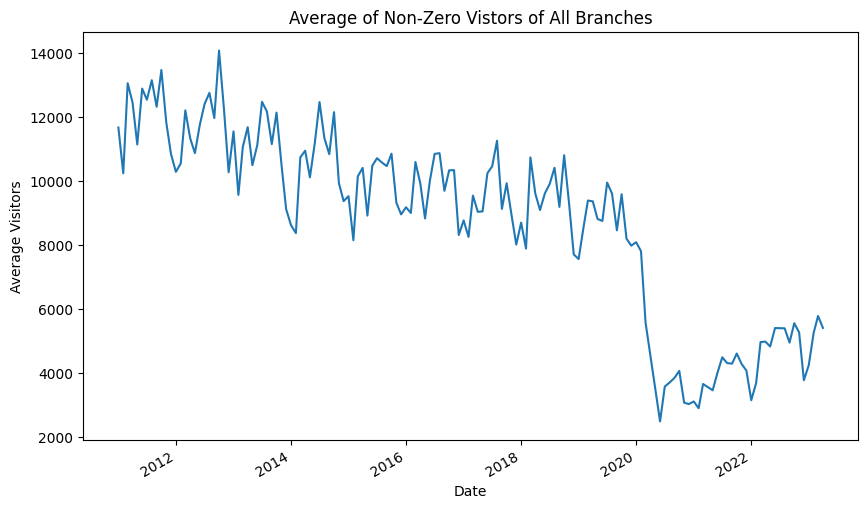

In [88]:
# Convert the 'YEAR' and 'MONTH' columns to a datetime format
Analyez['DATE'] = pd.to_datetime(Analyez[['YEAR', 'MONTH']].assign(DAY=1))

nonzero_libraries = Analyez[(Analyez['VISITORS'] > 0) & (Analyez['COMPUTER_SESSIONS'] > 0)]
nonzero_libraries


# Group the data by 'DATE' and calculate the mean number of visitors
monthly_visitors_nonzero = nonzero_libraries.groupby('DATE')['VISITORS'].mean()

# Plot the monthly visitor patterns
monthly_visitors_nonzero.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Visitors', title ='Average of Non-Zero Vistors of All Branches')
 


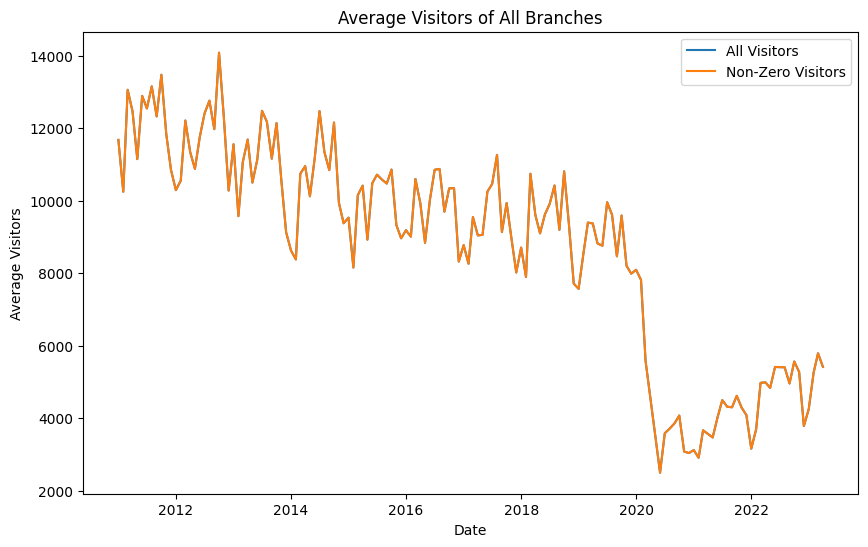

In [100]:

# Plot the monthly visitor patterns on one graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_visitors.index, monthly_visitors.values, label='All Visitors')
plt.plot(monthly_visitors_nonzero.index, monthly_visitors_nonzero.values, label='Non-Zero Visitors')
plt.xlabel('Date')
plt.ylabel('Average Visitors')
plt.title('Average Visitors of All Branches')
plt.legend()
plt.show()



In [103]:
monthly_visitors.index
len(monthly_visitors)

146

In [102]:
monthly_visitors_nonzero.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', name='DATE', length=146, freq=None)

In [65]:
Analyez.groupby('DATE')['VISITORS'].mean()

DATE
2011-01-01    11338.164557
2011-02-01     9942.164557
2011-03-01    12527.037975
2011-04-01    11768.189873
2011-05-01    10912.303797
                  ...     
2022-12-01     3731.555556
2023-01-01     4200.765432
2023-02-01     5190.234568
2023-03-01     5735.703704
2023-04-01     5367.827160
Name: VISITORS, Length: 148, dtype: float64

- Here I Converted the 'YEAR' and 'MONTH' columns to a datetime format and then I Grouped the data by 'DATE' and calculate the mean number of visitors to see the avergages of visitors for each year



3. What was the month with the highest average number of visitors?

In [66]:
max_visitors_month = monthly_visitors.idxmax().strftime('%B %Y')
print(f"The month with the highest average number of visitors was {max_visitors_month}.")


The month with the highest average number of visitors was October 2012.


4. What branch had the highest number of visitors in a specific month?

In [67]:
jan_2023_data = Analyez[(Analyez['YEAR'] == 2023) & (Analyez['MONTH'] == 1)]
branch_with_max_visitors = jan_2023_data.loc[jan_2023_data['VISITORS'].idxmax(), 'BRANCH']
print(f"The branch with the highest number of visitors in January 2023 was {branch_with_max_visitors}.")


The branch with the highest number of visitors in January 2023 was Harold Washington Library Center.


5. How does the average number of visitors change over the years?

<Axes: title={'center': 'Visitors Average Change Over the Years'}, xlabel='Year', ylabel='Average Visitors'>

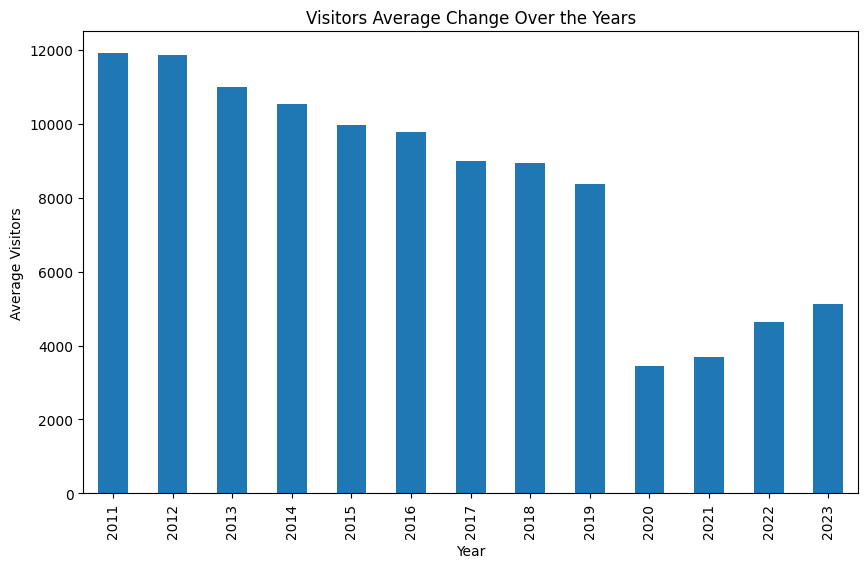

In [68]:
# Group the data by 'YEAR' and calculate the mean number of visitors
yearly_visitors = Analyez.groupby('YEAR')['VISITORS'].mean()

# Plot the average number of visitors over the years
yearly_visitors.plot(kind='bar', figsize=(10, 6), xlabel='Year', ylabel='Average Visitors', title='Visitors Average Change Over the Years')


6. Are there any seasonal patterns in the number of visitors?

<Axes: title={'center': 'Monthly Average Visitors'}, xlabel='Month', ylabel='Average Visitors'>

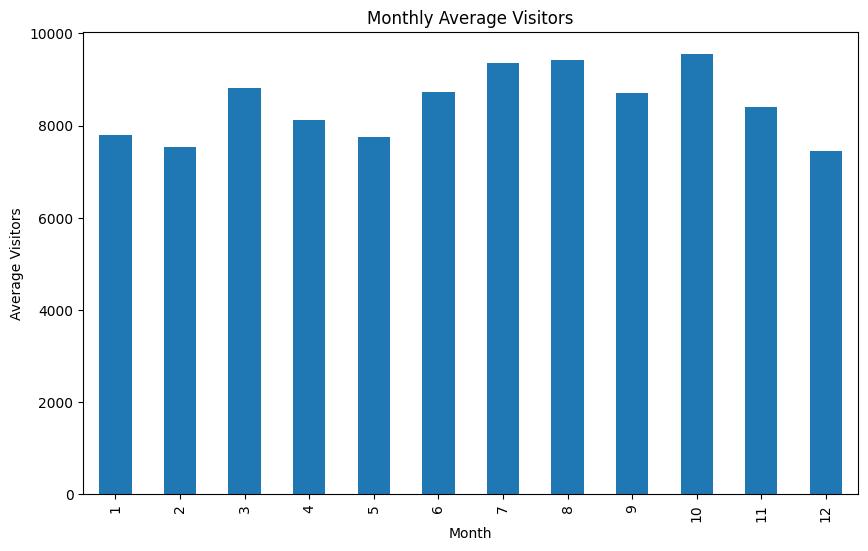

In [69]:
# Extract the month from the 'DATE' column
Analyez['MONTH'] = pd.to_datetime(Analyez['DATE']).dt.month

# Group the data by 'MONTH' and calculate the average number of visitors
monthly_avg_visitors = Analyez.groupby('MONTH')['VISITORS'].mean()

# Plot the average number of visitors by month
monthly_avg_visitors.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Average Visitors', title='Monthly Average Visitors')


7. How does the number of visitors vary across different branches?

<Axes: title={'center': 'Average of Visitors by Branch'}, xlabel='Branch', ylabel='Total Visitors'>

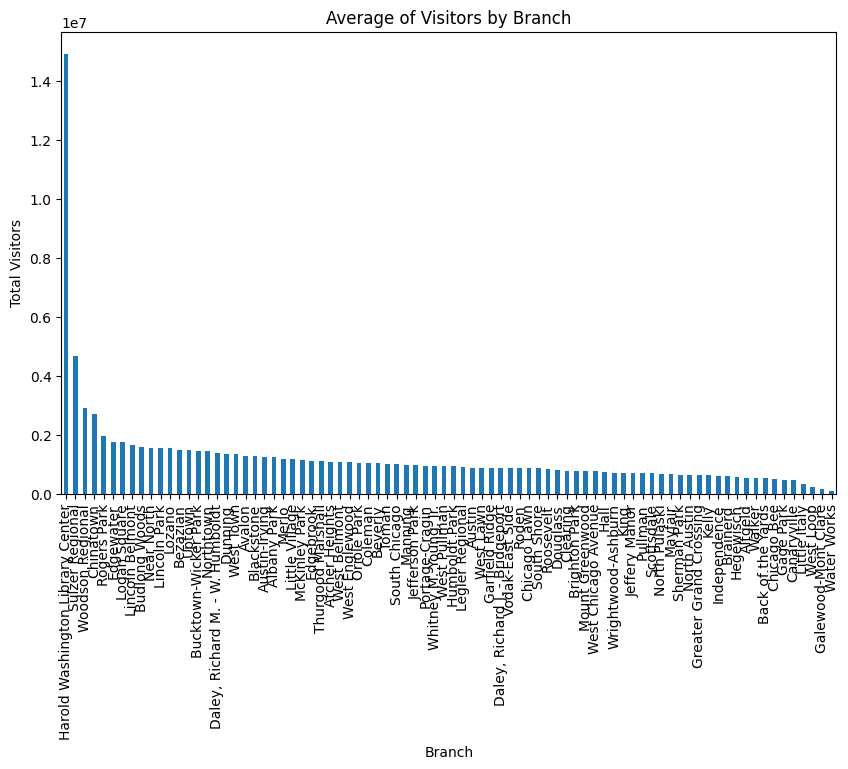

In [70]:
# Group the data by 'BRANCH' and calculate the total number of visitors
branch_total_visitors = Analyez.groupby('BRANCH')['VISITORS'].sum()

# Sort the branches based on the total number of visitors in descending order
sorted_branches = branch_total_visitors.sort_values(ascending=False)

# Plot the total number of visitors by branch
sorted_branches.plot(kind='bar', figsize=(10, 6), xlabel='Branch', ylabel='Total Visitors', title='Average of Visitors by Branch')


8. Is there a correlation between the number of computer sessions and the number of visitors?

In [71]:
# Calculate the correlation coefficient between 'COMPUTER_SESSIONS' and 'VISITORS'
correlation = Analyez['COMPUTER_SESSIONS'].corr(Analyez['VISITORS'])

print(f"The correlation coefficient between computer sessions and visitors is: {correlation}")


The correlation coefficient between computer sessions and visitors is: 0.9407945380919744


9. Is there a difference in visitor patterns between weekdays and weekends?

<Axes: title={'center': 'Average Number of Visitors for Day of Week'}, xlabel='Day of Week', ylabel='Average Visitors'>

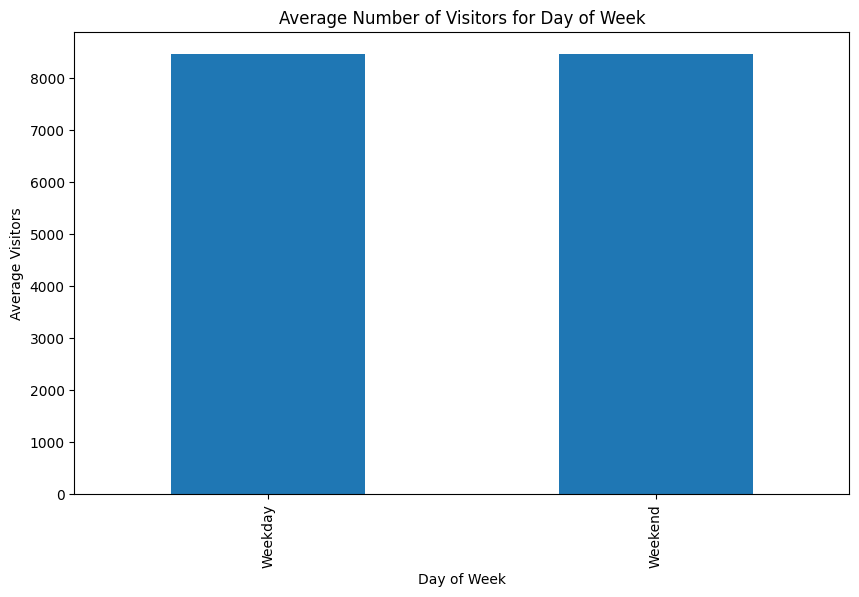

In [72]:
# Extract the day of the week from the 'DATE' column
Analyez['DAY_OF_WEEK'] = pd.to_datetime(Analyez['DATE']).dt.dayofweek

# Create a new column 'WEEKDAY' to differentiate between weekdays (0-4) and weekends (5-6)
Analyez['WEEKDAY'] = Analyez['DAY_OF_WEEK'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group the data by 'WEEKDAY' and calculate the average number of visitors
weekday_avg_visitors = Analyez.groupby('WEEKDAY')['VISITORS'].mean()

# Plot the average number of visitors for weekdays and weekends
weekday_avg_visitors.plot(kind='bar', figsize=(10, 6), xlabel='Day of Week', ylabel='Average Visitors', title= 'Average Number of Visitors for Day of Week')


10. How does the number of visitors vary across different years for a specific branch?

<Axes: title={'center': 'Average of Visitors of Wrightwood-Ashburn Branch Over the Years'}, xlabel='Year', ylabel='Total Visitors'>

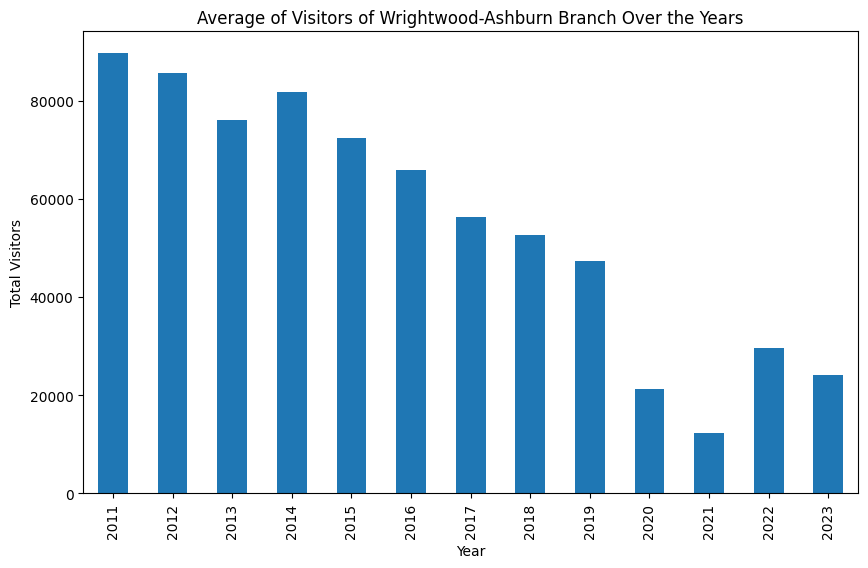

In [73]:
# Choose a specific branch for analysis (e.g., 'Albany Park')
selected_branch = 'Wrightwood-Ashburn'

# Filter the data for the selected branch
branch_data = Analyez[Analyez['BRANCH'] == selected_branch]

# Group the filtered data by 'YEAR' and calculate the total number of visitors
yearly_visitors_branch = branch_data.groupby('YEAR')['VISITORS'].sum()

# Plot the total number of visitors for the selected branch by year
yearly_visitors_branch.plot(kind='bar', figsize=(10, 6), xlabel='Year', ylabel='Total Visitors', title='Average of Visitors of Wrightwood-Ashburn Branch Over the Years')


In [74]:
library_branches = Analyez[['BRANCH','VISITORS']]
library_branches.head()

,BRANCH,VISITORS
0,Albany Park,9604.0
1,Albany Park,10500.0
2,Albany Park,9050.0
3,Albany Park,9300.0
4,Albany Park,8271.0


In [75]:
library_branches = Analyez[['BRANCH','VISITORS']]
library_branches.tail()

,BRANCH,VISITORS
11875,Wrightwood-Ashburn,1410.0
11876,Wrightwood-Ashburn,1625.0
11877,Wrightwood-Ashburn,12146.0
11878,Wrightwood-Ashburn,6312.0
11879,Wrightwood-Ashburn,4074.0


In [76]:
locations = pd.read_csv('../data/clean/branches.csv')
locations

,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65719847558056, -87.59883829075173)",0
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.80110836194246, -87.72648385568911)",0
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.88917312206642, -87.7658203582574)",0
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95312267684315, -87.77928489355646)",0
...,...,...,...,...,...,...,...,...,...,...
77,West Pullman,"Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...",830 W. 119th St.,Chicago,IL,60643,(312) 747-1425,https://www.chipublib.org/locations/78/,"(41.67790647382097, -87.6431683153105)",0
78,West Town,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",1625 W. Chicago Ave.,Chicago,IL,60622,(312) 743-0450,https://www.chipublib.org/locations/79/,"(41.89594730478282, -87.66829305460979)",0
79,"Whitney M. Young, Jr.","Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",415 East 79th St.,Chicago,IL,60619,(312) 747-0039,https://www.chipublib.org/locations/80/,"(41.7510184591363, -87.61495065361933)",0
80,Woodson Regional Library,"Mon. - Thurs., 9-8; Fri. & Sat., 9-5; Sun., 1-5",9525 S. Halsted St.,Chicago,IL,60628,(312) 747-6900,https://www.chipublib.org/locations/81/,"(41.720694885749005, -87.64304817213312)",0


In [77]:
Analyez = Analyez.merge(locations)
Analyez

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS,DATE,DAY_OF_WEEK,WEEKDAY,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED
0,Albany Park,2011,1,8427.0,1666.0,9604.0,2011-01-01,5,Weekend,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
1,Albany Park,2011,2,7023.0,1296.0,10500.0,2011-02-01,1,Weekday,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
2,Albany Park,2011,3,9702.0,1735.0,9050.0,2011-03-01,1,Weekday,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
3,Albany Park,2011,4,9344.0,1841.0,9300.0,2011-04-01,4,Weekday,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
4,Albany Park,2011,5,8865.0,1683.0,8271.0,2011-05-01,6,Weekend,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11727,Wrightwood-Ashburn,2022,12,575.0,511.0,1410.0,2022-12-01,3,Weekday,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",8530 S. Kedzie Ave.,Chicago,IL,60652,(312) 747-2696,https://www.chipublib.org/locations/82/,"(41.73795704970435, -87.70221598421591)",0
11728,Wrightwood-Ashburn,2023,1,658.0,577.0,1625.0,2023-01-01,6,Weekend,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",8530 S. Kedzie Ave.,Chicago,IL,60652,(312) 747-2696,https://www.chipublib.org/locations/82/,"(41.73795704970435, -87.70221598421591)",0
11729,Wrightwood-Ashburn,2023,2,683.0,561.0,12146.0,2023-02-01,2,Weekday,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",8530 S. Kedzie Ave.,Chicago,IL,60652,(312) 747-2696,https://www.chipublib.org/locations/82/,"(41.73795704970435, -87.70221598421591)",0
11730,Wrightwood-Ashburn,2023,3,834.0,806.0,6312.0,2023-03-01,2,Weekday,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",8530 S. Kedzie Ave.,Chicago,IL,60652,(312) 747-2696,https://www.chipublib.org/locations/82/,"(41.73795704970435, -87.70221598421591)",0


In [78]:
# Extract latitude and longitude from the "LOCATION" column
locations['LATITUDE'] = locations['LOCATION'].apply(lambda x: float(x.split(',')[0].strip('()')))
locations['LONGITUDE'] = locations['LOCATION'].apply(lambda x: float(x.split(',')[1].strip('()')))

# Display the updated DataFrame with latitude and longitude columns
print(locations[['BRANCH', 'LATITUDE', 'LONGITUDE']])

                      BRANCH   LATITUDE  LONGITUDE
0                Albany Park  41.975579 -87.713613
1                    Altgeld  41.657198 -87.598838
2             Archer Heights  41.801108 -87.726484
3                     Austin  41.889173 -87.765820
4              Austin-Irving  41.953123 -87.779285
..                       ...        ...        ...
77              West Pullman  41.677906 -87.643168
78                 West Town  41.895947 -87.668293
79     Whitney M. Young, Jr.  41.751018 -87.614951
80  Woodson Regional Library  41.720695 -87.643048
81        Wrightwood-Ashburn  41.737957 -87.702216

[82 rows x 3 columns]


In [79]:
import folium

In [80]:
# Create a folium map centered on Chicago
map_chicago = folium.Map(location=[41.657198, -87.598838], zoom_start=10)

# Add markers for each branch
for _, location in locations.iterrows():
    branch = location['BRANCH']
    latitude = location['LATITUDE']
    longitude = location['LONGITUDE']
    
    marker = folium.Marker(location=[latitude, longitude], popup=branch)
    #marker = folium.Marker(location=[latitude, longitude])
    marker.add_to(map_chicago)

# Display the map
map_chicago

In [82]:
branch_counts.head()


,BRANCH,VISITORS
0,Albany Park,1224086.0
1,Altgeld,530982.0
2,Archer Heights,1085155.0
3,Austin,879538.0
4,Austin-Irving,1226173.0
